# Pymaceuticals Inc.
---

### Analysis

Introduction
The objective of this analysis is to investigate the relationship between mouse weight and the average observed tumor volume for mice treated with Capomulin regimen. This study aims to determine if there's a significant correlation between these two variables and to visualize this relationship using data visualization techniques.

Methodology
Data Preparation:
1. Data Filtering - the dataset 'research_data_unique' was filtered to extract records corresponding to the Capomulin regimen using the condition 'research_data_unique['Drug Regimen'] == 'Capomulin''.
2. Average Tumor Volume Calculation: the average tumor volume was calculated for each mouse using the 'groupby('Mouse ID')['Tumor Volume (mm3)'].mean()' method.
3. Data Merging: the average tumor volume data was merged with the original dataset to obtain the weight for each mouse using 'pd.merge()'.

Analysis and Interpretation
1. Correlation Analysis:
   * the correlation coefficiant value obtained suggest a positive correlation between mouse weight and average tumor volume in the Capomulin regimen.
   * The positive correlation indicatef that as the mouse weight increases, the average tumor volume tends to increase, suggesting a potential relationship between these two variables.
  
2. Linear Regression Analysis:
   * The linear regression line provides a visual representation of the relationship between mouse weight and average tumor volume.
   * The upward tend observed in the scatter plot and regression line indicates a positive relationship, supporting the correlation analysis.
  
3. Insights:
   * The positive correlation and the upward trend observed in the scatter plot and regression line suggest that there's a tendancy for the tumor volume to increase with the increase in mouse weight within this specific dataset and treatment regimen.
   * The finding provide initial insights into the potential relationship between mouse weight and tumor volume in the context of the Capomulin regimen.
  
Conclusion

* The analysis indicates a positive correlation between mouse weight and average tumor volume for mice treated with the Capomulin regimen.
* The visualization techniques used provide valuable insights into the relationship between these two variables.
* Further studeis and experiments may be required to validate these findings and explore potential underlying factors influencing this relationship

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
research_data= pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
research_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = research_data['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = research_data[research_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
research_data_unique = research_data[research_data['Mouse ID'] != 'g989']
research_data_unique.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = research_data_unique['Mouse ID'].nunique()
number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_group = research_data_unique.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean= drug_regimen_group['Tumor Volume (mm3)'].mean()
median= drug_regimen_group['Tumor Volume (mm3)'].median()
variance = drug_regimen_group['Tumor Volume (mm3)'].var()
std_dev = drug_regimen_group['Tumor Volume (mm3)'].std()
std_err = drug_regimen_group['Tumor Volume (mm3)'].apply(lambda x: np.std(x, ddof = 1) / np.sqrt(len(x)))

# Assemble the resulting series into a single summary DataFrame.
drug_statistics = pd.DataFrame ({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, 
                                "Tumor Volume Std.Dev.": std_dev, "Tumor Volume Std. Err.": std_err})
drug_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = drug_regimen_group['Tumor Volume (mm3)'].agg(Mean = 'mean', Median = 'median', Variance = 'var',
                                                                  Std_Dev = 'std', SEM = lambda x: np.std(x, ddof = 1) / np.sqrt(len(x)))
summary_statistics

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

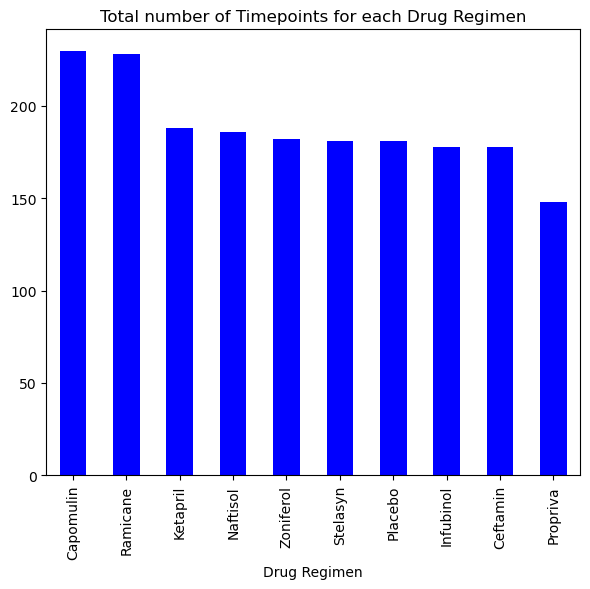

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = research_data_unique['Drug Regimen'].value_counts()
drug_counts.plot(kind = 'bar', color = 'b', alpha = 1, figsize = (6,6))
plt.title('Total number of Timepoints for each Drug Regimen')
plt.xlabel = ('Drug Regimen')
plt.ylabel = ('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

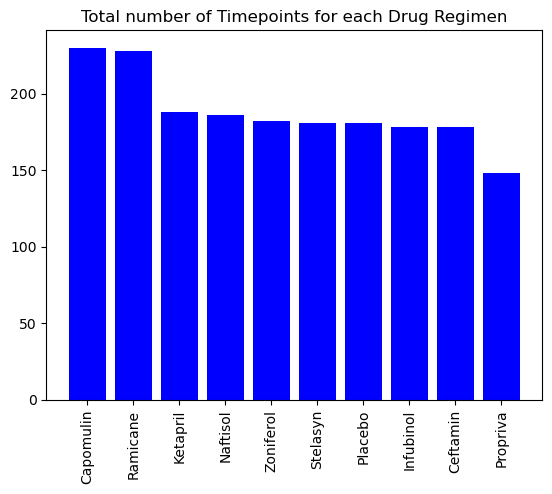

In [10]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = drug_counts.index
counts = drug_counts.values
plt.bar(drug_regimen, counts, color = 'b', alpha = 1, align = "center")
plt.title('Total number of Timepoints for each Drug Regimen')
plt.xlabel = ('Drug Regimen')
plt.ylabel = ('# of Observed Mouse Timepoints')
plt.xticks(rotation = 90)
plt.show

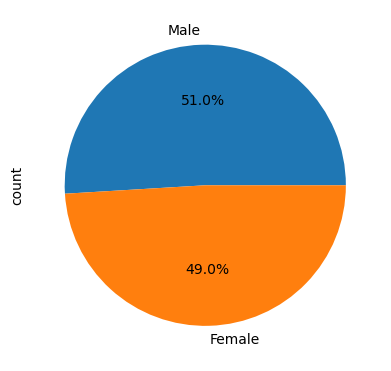

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = research_data_unique['Sex'].value_counts()
gender_counts.plot.pie( figsize = (4,4),autopct = "%1.1f%%", color = ["Blue", "Orange"], startangle = 0)
plt.ylabel = 'Sex'
plt.tight_layout()
plt.show()

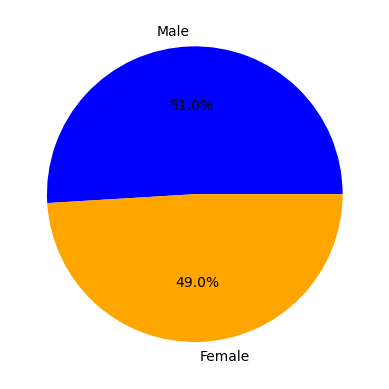

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = research_data_unique['Sex'].value_counts()
type = gender_counts.index
count = gender_counts.values
colors = ["Blue", "Orange"]
explode = (0,0)
plt.pie(count, explode = explode, labels = type, colors = colors, autopct = "%1.1f%%", shadow = False, startangle = 0)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = research_data_unique[research_data_unique['Drug Regimen'].isin(four_regimen)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on = ['Mouse ID', 'Timepoint'], how = 'left')[['Mouse ID','Timepoint','Tumor Volume (mm3)',
                                                                                                            'Drug Regimen']]
final_tumor_volume .head()                                              

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


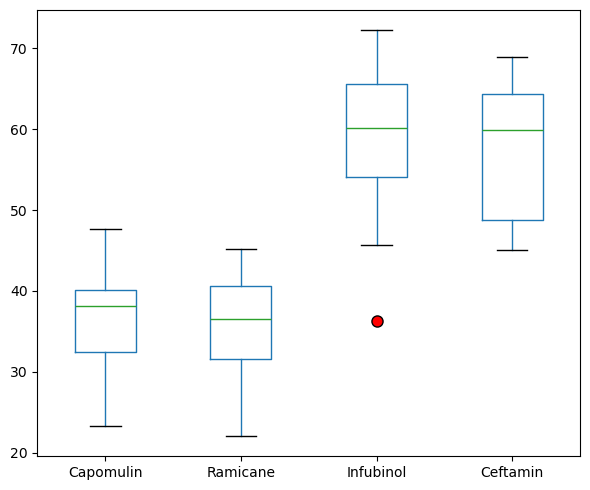

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_df = pd.DataFrame(tumor_vol_data, index = treatments).T
tumor_vol_df.boxplot(grid = False, figsize = (6,5), flierprops = dict(marker = 'o', markerfacecolor = 'r', markersize = 8))
plt.tight_layout()
plt.show()


## Line and Scatter Plots

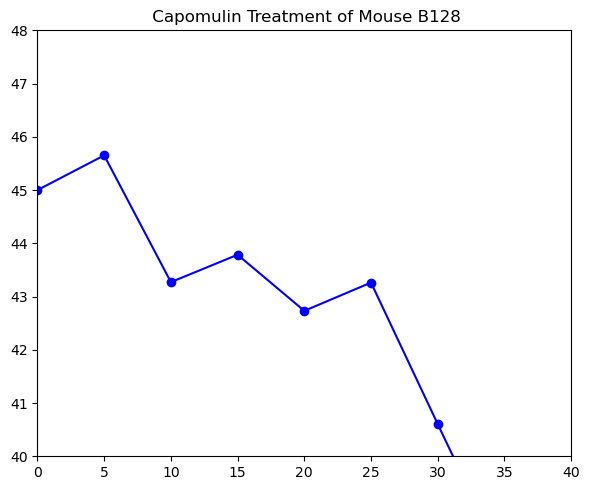

In [16]:
mouse_id = 'b128'

mouse_data = research_data_unique[(research_data_unique['Mouse ID'] == mouse_id) & (research_data_unique['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize = (6,5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker = 'o', color = 'b', label = f'Mouse ID: {mouse_id}')

plt.grid(False)

plt.xlim( 0, 40)
plt.ylim(40, 48)

plt.title(f' Capomulin Treatment of Mouse B128')
plt.xlabel = ('Timepoint')
plt.ylabel = ('Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

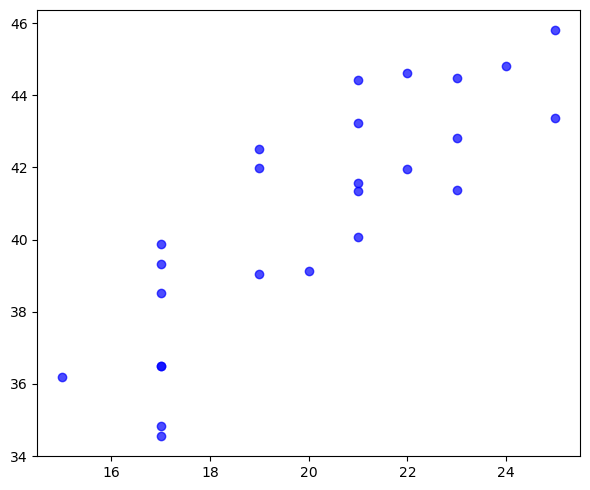

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = research_data_unique[research_data_unique['Drug Regimen']=='Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on= 'Mouse ID')

plt.figure(figsize = (6, 5))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color = 'blue', alpha = 0.7)

plt.xlabel = ("Weight (g)")
plt.ylabel = ("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

## Correlation and Regression

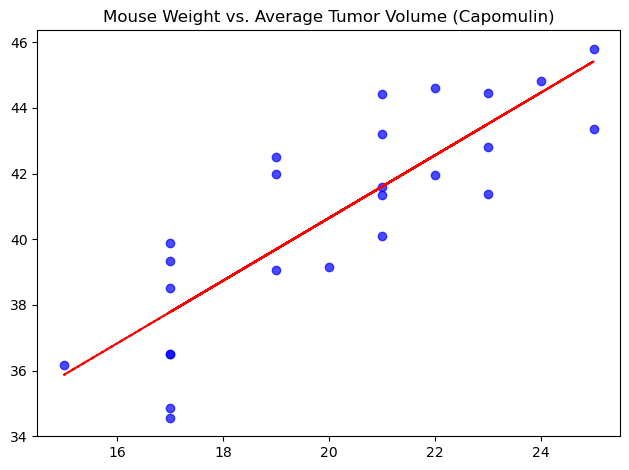

In [18]:
# Calculate the correlation coefficient and a linear regression model 
capomulin_data = research_data_unique[research_data_unique['Drug Regimen']== 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on= 'Mouse ID')

correlation_coefficient = stats.pearsonr(merged_data['Weight (g)'], merged_data ['Tumor Volume (mm3)'])[0]

slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color = 'red', linestyle = '--')
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color = 'blue', alpha = 0.7)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel = ('Weight(g)')
plt.ylabel = ('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()